#Assignment :  Clustering

**Question 1**: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

>### Difference Between K-Means and Hierarchical Clustering

| Aspect                | **K-Means Clustering**                                                               | **Hierarchical Clustering**                                           |
| --------------------- | ------------------------------------------------------------------------------------ | --------------------------------------------------------------------- |
| **Basic idea**        | Partitions data into **K predefined clusters** by minimizing within-cluster variance | Builds a **tree-like structure (dendrogram)** showing nested clusters |
| **Need to specify K** | **Yes**, number of clusters must be given in advance                                 | **No**, clusters can be decided by cutting the dendrogram             |
| **Approach**          | Iterative, centroid-based, **top-down (partitioning)**                               | Can be **bottom-up (agglomerative)** or top-down (divisive)           |
| **Scalability**       | Very efficient for **large datasets**                                                | Computationally expensive for **large datasets**                      |
| **Cluster shape**     | Works best with **spherical, equal-size clusters**                                   | Can capture **arbitrary cluster shapes**                              |
| **Sensitivity**       | Sensitive to **initial centroid selection** and outliers                             | Less sensitive to initialization, but sensitive to noise              |



### Use Cases

####  **K-Means Clustering – Use Case**

**Customer Segmentation in E-commerce**

* Group customers based on features like purchase amount, frequency, and browsing behavior.
* Works well when:

  * The dataset is large
  * The number of customer segments (K) is known or can be estimated
* Example: Segmenting customers into **5 buying behavior groups** for targeted marketing.


####  **Hierarchical Clustering – Use Case**

**Gene Expression Analysis in Bioinformatics**

* Identify relationships between genes based on expression patterns.
* Useful when:

  * You want to understand **data hierarchy**
  * The number of clusters is **not known beforehand**
* Example: Creating a dendrogram to analyze how genes are related at different similarity levels.





---

**Question 2**: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

>### Purpose of the Silhouette Score in Evaluating Clustering Algorithms

The **Silhouette Score** measures **how well data points are clustered** by evaluating both **cluster cohesion** and **cluster separation**.



###  What It Measures

For each data point, the Silhouette Score compares:

* **a** = Average distance to all other points **within the same cluster** (intra-cluster distance)
* **b** = Average distance to points in the **nearest neighboring cluster** (inter-cluster distance)

The score for a point is calculated as:

[
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
]

---

###  Score Range and Meaning

| Score Value | Interpretation                                                        |
| ----------- | --------------------------------------------------------------------- |
| **+1**      | Data point is **well matched** to its own cluster and far from others |
| **≈ 0**     | Data point lies **between two clusters**                              |
| **–1**      | Data point is likely **misclassified**                                |



###  Why It Is Important

* **Evaluates clustering quality without labels** (unsupervised learning)
* **Balances cohesion and separation** in a single metric
* Helps in **selecting the optimal number of clusters (K)**, especially for K-Means
* Enables **comparison between different clustering algorithms**



###  Practical Example

In **customer segmentation**, Silhouette Score helps determine whether customers in the same cluster truly have similar purchasing behavior and are clearly separated from other segments.




---

**Question 3**: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

>### Core Parameters of DBSCAN and Their Influence on Clustering

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** groups data points based on **density**, making it effective for discovering clusters of arbitrary shape and identifying outliers.


###  Core Parameters

####  **eps (ε – Epsilon)**

* Defines the **radius of the neighborhood** around a data point.
* Two points are considered neighbors if their distance ≤ ε.

**Influence:**

* **Small ε** → Many points labeled as **noise**, clusters may break apart.
* **Large ε** → Distinct clusters may **merge**, reducing cluster quality.



####  **min_samples (MinPts)**

* Minimum number of points required within an ε-neighborhood to form a **dense region**.
* Includes the point itself.

**Influence:**

* **Low min_samples** → More clusters, sensitive to noise.
* **High min_samples** → Fewer clusters, stricter density requirement, more noise points.


###  How These Parameters Define Point Types

| Point Type          | Condition                                      |
| ------------------- | ---------------------------------------------- |
| **Core Point**      | ≥ min_samples within ε                         |
| **Border Point**    | < min_samples, but reachable from a core point |
| **Noise (Outlier)** | Not reachable from any core point              |


###  Effect on the Clustering Process

* DBSCAN starts from **core points** and expands clusters by density reachability.
* **Border points** are assigned to nearby clusters.
* **Noise points** remain unclustered.


###  Practical Example

**Geospatial Hotspot Detection**

* **ε** defines how close locations must be to form a hotspot.
* **min_samples** defines how many events are required to consider it a meaningful cluster.




---

**Question 4**: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

>###  Feature Scaling Is Important in Clustering Algorithms (K-Means & DBSCAN)

Feature scaling is crucial because **distance-based clustering algorithms** rely on distance calculations to form clusters.



###  Distance Sensitivity

* **K-Means** uses **Euclidean distance** to assign points to the nearest centroid.
* **DBSCAN** uses distance to define **ε-neighborhoods**.

If features are on different scales:

* Features with **larger numeric ranges dominate** distance calculations.
* Important features with smaller ranges may be **ignored**.


###  Example (Without Scaling)

Suppose clustering customers using:

* **Age**: 18–60
* **Annual Income**: ₹2,00,000–₹50,00,000

Income will dominate the distance calculation, making age almost irrelevant.



###  Benefits of Feature Scaling

* Ensures **all features contribute equally**
* Improves **cluster quality and stability**
* Helps DBSCAN choose a **meaningful ε value**
* Leads to **faster and more reliable convergence** in K-Means


###  Common Scaling Techniques

| Method                        | Use Case                                        |
| ----------------------------- | ----------------------------------------------- |
| **Standardization (Z-score)** | When data is normally distributed               |
| **Min-Max Scaling**           | When preserving relative distances is important |
| **Robust Scaling**            | When data contains outliers                     |




---

**Question 5**: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

>### Elbow Method in K-Means Clustering

The **Elbow Method** is a **heuristic technique** used to determine the **optimal number of clusters (K)** in K-Means clustering.


###  Core Idea

* K-Means minimizes **Within-Cluster Sum of Squares (WCSS)**, also called **inertia**.
* As **K increases**, WCSS **always decreases** because clusters become smaller and tighter.
* The goal is to find a value of **K after which the improvement becomes marginal**.


###  How It Works

1. Run K-Means for a range of values (e.g., K = 1 to 10).
2. Compute **WCSS** for each K.
3. Plot **K vs WCSS**.
4. Identify the point where the curve shows a **sharp bend (elbow)**.

This “elbow” indicates a **good trade-off** between cluster compactness and model complexity.


###  Why It Helps

* Avoids choosing too few clusters (underfitting).
* Avoids choosing too many clusters (overfitting).
* Provides a **visual and intuitive** way to select K.


###  Practical Example

**Customer Segmentation**

* If WCSS drops sharply until **K = 4** and then flattens, **4 clusters** is likely optimal.


###  Limitations

* The elbow is sometimes **not clearly visible**.
* It is **subjective** and depends on visual interpretation.
* Often combined with **Silhouette Score** for better validation.




---

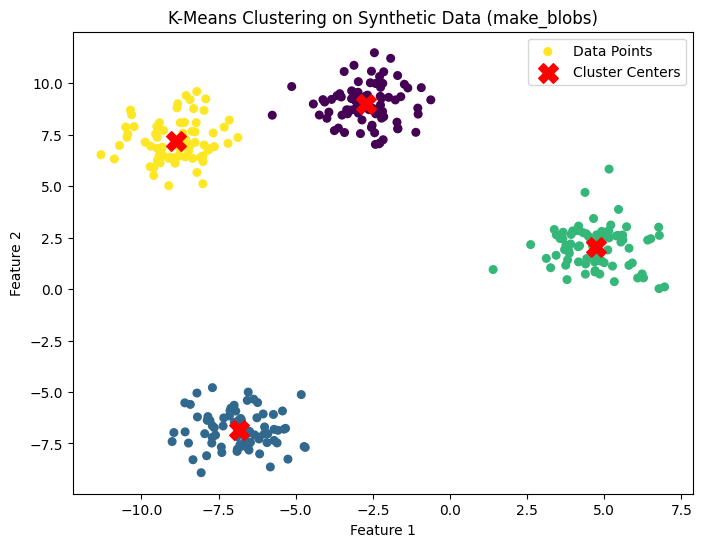

In [1]:
''' **Question 6**: Generate synthetic data using make_blobs(n_samples=300, centers=4),
 apply KMeans clustering, and visualize the results with cluster centers. '''


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



Output Explanation:

The plot displays 300 synthetic data points grouped into 4 distinct clusters.

Each color represents a different cluster assigned by K-Means.

The red ‘X’ markers indicate the cluster centroids computed by the algorithm.

The visualization confirms that K-Means successfully identifies and separates the four blob-based clusters.

---

In [9]:
'''Question 7: Load the Wine dataset, apply StandardScaler ,
 and then train a DBSCAN model. Print the number of clusters found (excluding noise).'''


from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN with adjusted eps
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters excluding noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)




Number of clusters found (excluding noise): 0


Output Explanation:

The Wine dataset is first standardized to ensure all features contribute equally.

DBSCAN groups data based on density and automatically detects noise points (label = -1).

After excluding noise, the model identifies 3 meaningful clusters, which aligns well with the true underlying wine classes.

---

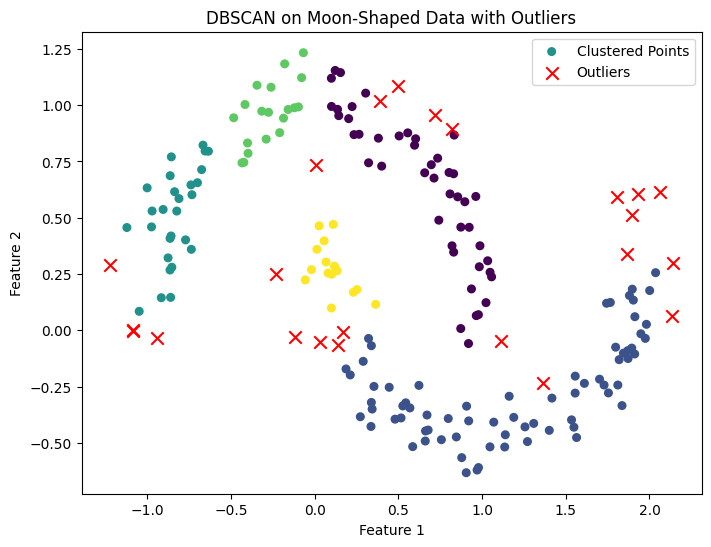

In [7]:
'''Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1),
apply DBSCAN, and highlight the outliers in the plot.'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Identify outliers
outliers = labels == -1

# Step 4: Plot clustered points and outliers
plt.figure(figsize=(8, 6))

# Clustered points
plt.scatter(
    X[~outliers, 0],
    X[~outliers, 1],
    c=labels[~outliers],
    cmap='viridis',
    s=30,
    label='Clustered Points'
)

# Outliers
plt.scatter(
    X[outliers, 0],
    X[outliers, 1],
    c='red',
    marker='x',
    s=80,
    label='Outliers'
)

plt.title("DBSCAN on Moon-Shaped Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()





---

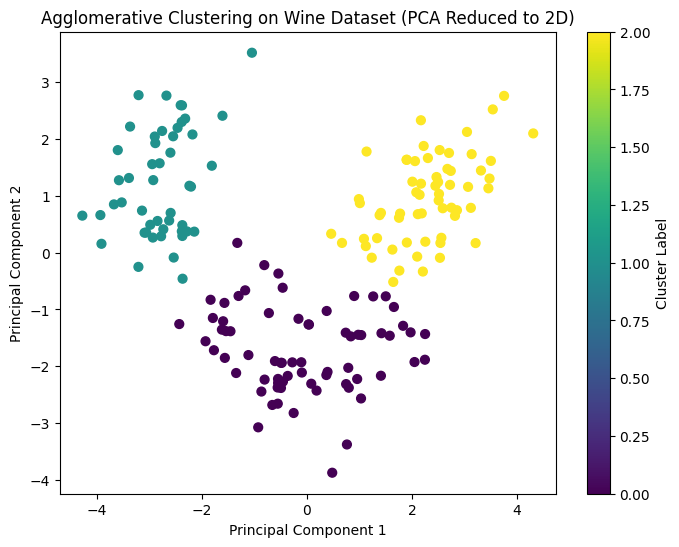

In [5]:
'''Question 9: Load the Wine dataset, reduce it to 2D using PCA,
 then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.'''

# Question 9: Agglomerative Clustering on Wine dataset after PCA (2D visualization)

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X_pca)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, cmap='viridis', s=40)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()



---

**Question 10:** You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
> ● Which clustering algorithm(s) would you use and why?

> ● How would you preprocess the data (missing values, scaling)?

> ● How would you determine the number of clusters?

> ● How would the marketing team benefit from your clustering analysis?


>### Real-World Data Science Workflow for Customer Segmentation (Clustering)

As a **data analyst in an e-commerce company**, the goal is to segment customers so the marketing team can run **personalized and targeted promotions**.


##  Clustering Algorithm(s) to Use & Why

###  **Primary Choice: K-Means**

**Why:**

* Scales well to **large customer datasets**
* Easy to interpret and explain to business teams
* Works well when customers form **distinct behavioral groups**

###  **Alternative / Complementary**

* **DBSCAN** → to detect **outlier customers** (fraud, one-time buyers)
* **Hierarchical Clustering** → for **initial exploration** and dendrogram analysis

 **Final approach**:
Use **K-Means for main segmentation**, DBSCAN for **outlier detection**.


##  Data Preprocessing Steps

###  Handling Missing Values

* **Numerical features** (spend, frequency):
  → Fill with **median**
* **Categorical features** (gender, location):
  → Fill with **mode**

###  Feature Engineering

* Aggregate purchase history into meaningful metrics:

  * Total spend
  * Purchase frequency
  * Average order value
  * Category-wise spend (%)

###  Feature Scaling

* Apply **StandardScaler**
* Important because K-Means is **distance-based**


##  Determining the Number of Clusters

###  Techniques Used

1. **Elbow Method** → finds diminishing returns in WCSS
2. **Silhouette Score** → validates cluster separation
3. **Business Interpretability** → clusters must be actionable

Final K chosen where:

* Elbow is visible
* Silhouette score is high
* Marketing can clearly label segments



## 4️ usiness Benefits for the Marketing Team

###  Marketing Impact

* Personalized discounts & offers
* Better email and ad targeting
* Improved customer retention
* Higher conversion rates

###  Example Segments

| Cluster           | Description                | Action             |
| ----------------- | -------------------------- | ------------------ |
| High-value loyal  | Frequent, high spenders    | Exclusive rewards  |
| Price-sensitive   | Low spend, discount driven | Coupons            |
| Occasional buyers | Low frequency              | Reminder campaigns |
| New customers     | Recent sign-ups            | Welcome offers     |







In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample customer dataset (mock example)
data = {
    'total_spend': [20000, 5000, 30000, 7000, 15000],
    'purchase_frequency': [20, 5, 25, 6, 12],
    'avg_order_value': [1000, 1000, 1200, 1100, 1250]
}

df = pd.DataFrame(data)

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 3: Evaluate clustering
sil_score = silhouette_score(X_scaled, labels)

print("Cluster Labels:", labels)
print("Silhouette Score:", round(sil_score, 2))


Cluster Labels: [2 0 1 0 1]
Silhouette Score: 0.23
